# **UCS2523 & Image Processing and Analysis**
# **CAT 1 - Assignment**
Name: Srinidhi VG, Tanisha Sriram\
Register Number: 3122 23 5001 137, 3122 23 5001 144


# 1. Image Acquisition
This image was captured using a smartphone camera. It was taken indoors with uniform lighting without much shadows which ensured the image was clear and the edges were also clear. The bright yellow wall was contrasting with the dark metal surface of the bicycle. This picture contains both straight lines and curves.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Noise Simulation
Two types of noises were added to the image


1.   **Salt & Pepper** - Impulse noise are the random black and white dots in the image. It can be mimiced for sensor errors or faults in transmissions.
2.   **Gaussian Noise** - It can be seen as random variations in pixel values and it mimics electronic noise, blurring out the fine details.



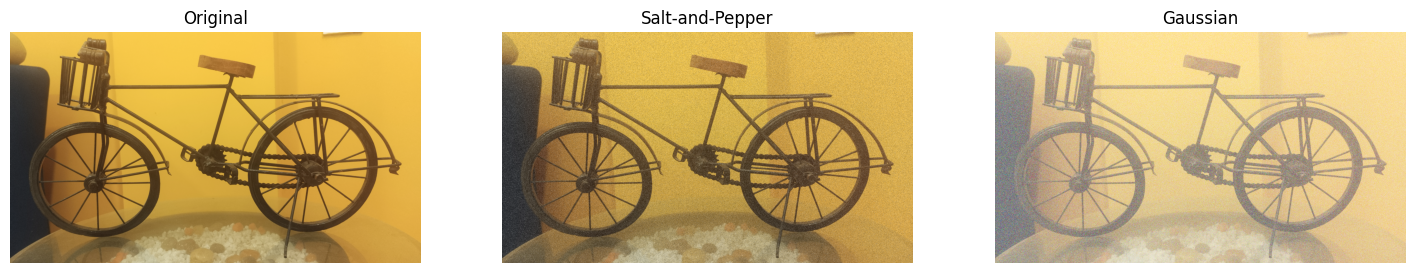

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/IPAImage.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Salt-and-Pepper Noise
def sp_noise(image, prob):
    output = np.copy(image)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
    return output

sp_img = sp_noise(img_rgb, 0.08)

# Gaussian Noise
def gauss_noise(image):
    row, col, ch = image.shape
    mean = 0
    var = 20
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch)).astype('uint8')
    noisy = cv2.add(image, gauss)
    return noisy


gauss_img = gauss_noise(img_rgb)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sp_img)
plt.title('Salt-and-Pepper')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gauss_img)
plt.title('Gaussian')
plt.axis('off')

plt.show()


# 3. Preprocessing and Enhancement

## A. Grayscale Conversion - Original
Helps in simplifying the image for processing.

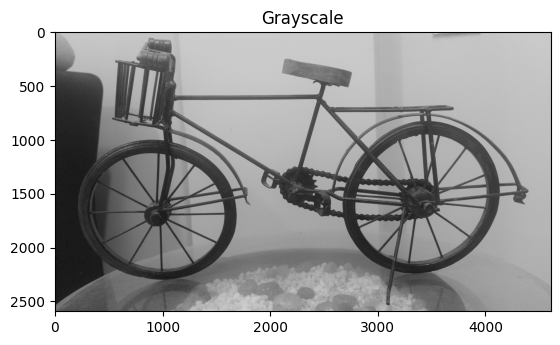

In [ ]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.show()

## B. Resizing - Original
It reduces the computational load and ensures consistent input size.

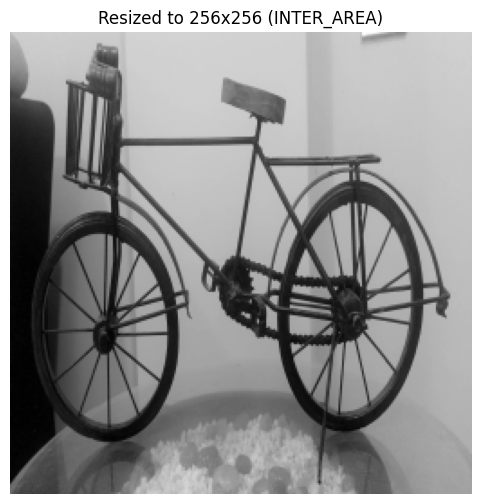

In [ ]:
gray_resized = cv2.resize(gray, (256, 256), interpolation=cv2.INTER_AREA)
plt.figure(figsize=(6,6))
plt.imshow(gray_resized, cmap='gray')
plt.title('Resized to 256x256 (INTER_AREA)')
plt.axis('off')
plt.show()

## C. Enhancement - Original

**Histogram Equalization**\
Improves global contrast by redistributing intensity values

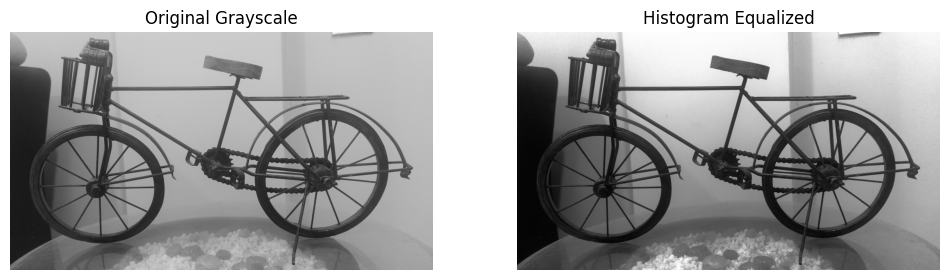

In [ ]:
hist_eq = cv2.equalizeHist(gray)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hist_eq, cmap='gray')
plt.title('Histogram Equalized')
plt.axis('off')

plt.show()

**Contrast Stretching**\
It stretches the intensity values to enhance contrast

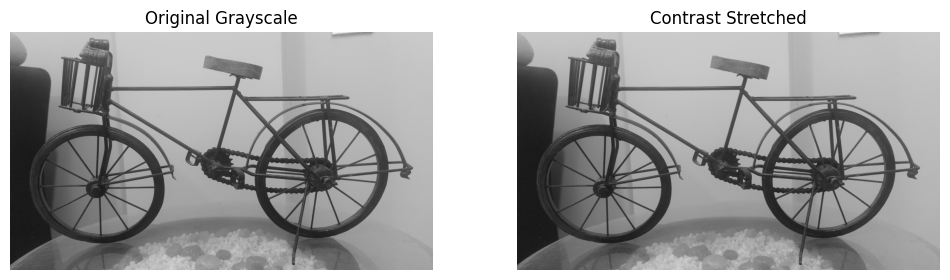

In [ ]:
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return stretched

contrast_img = contrast_stretching(gray)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contrast_img, cmap='gray')
plt.title('Contrast Stretched')
plt.axis('off')

plt.show()

**Log Transformation**\
Enhances details in dark regions by compressing dynamic range.

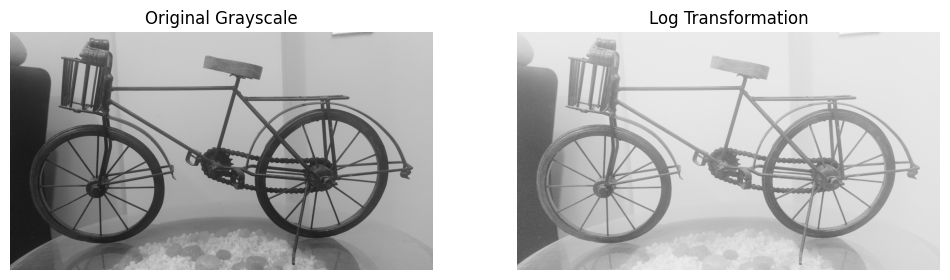

In [ ]:
c = 255 / np.log(1 + np.max(gray))
log_img = (c * (np.log(1 + gray))).astype(np.uint8)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(log_img, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')
plt.show()

**Inverse (Negative) Transformation**\
Highlights dark regions by inverting intensities

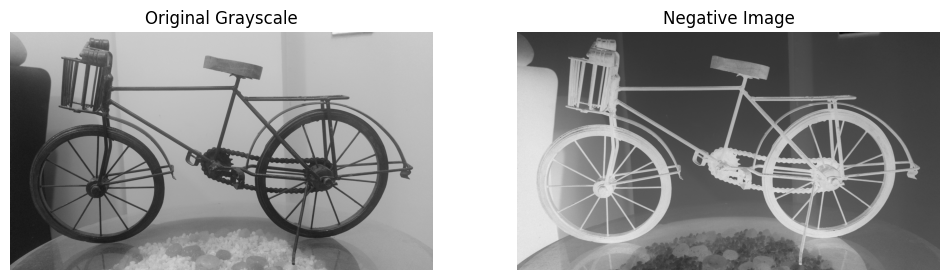

In [ ]:
neg_img = 255 - gray

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(neg_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show()

**Unsharp Masking (Sharpening)**\
Enhances edges by subtracting a blurred version from the original.

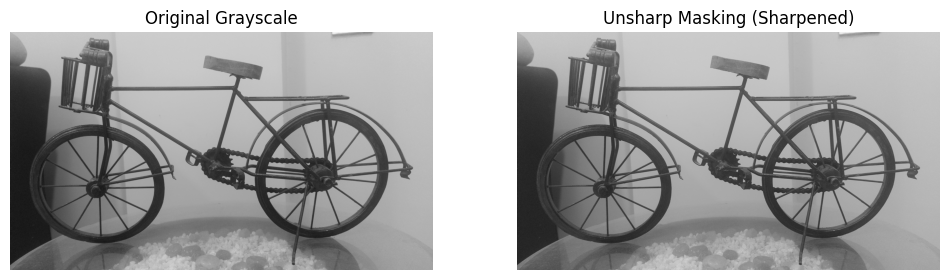

In [ ]:
blur = cv2.GaussianBlur(gray, (9, 9), 10)
unsharp_img = cv2.addWeighted(gray, 1.5, blur, -0.5, 0)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(unsharp_img, cmap='gray')
plt.title('Unsharp Masking (Sharpened)')
plt.axis('off')
plt.show()

## D. Pre-Processing & Enhancement - Salt & Pepper
Grayscaling, resizing and enhancing the image using histogram equilization.


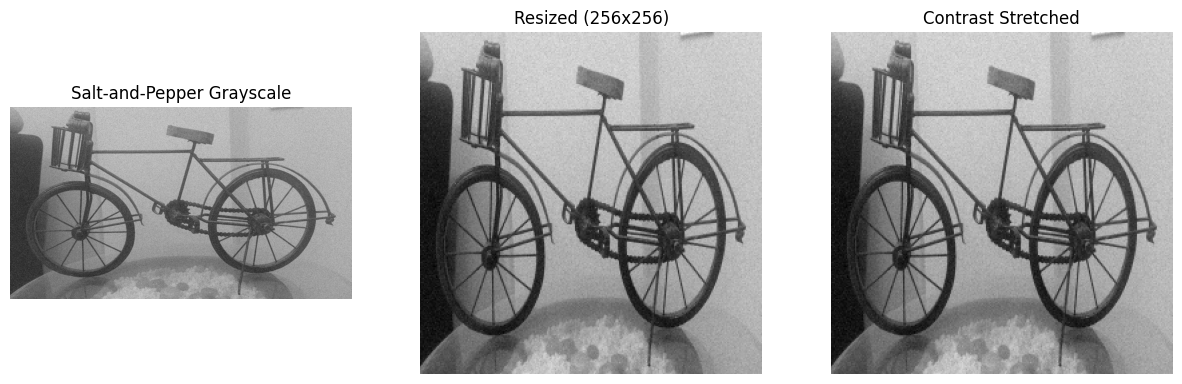

In [ ]:
import cv2
import matplotlib.pyplot as plt

sp_img_gray = cv2.cvtColor(sp_img, cv2.COLOR_RGB2GRAY)

sp_gray_resized = cv2.resize(sp_img_gray, (256, 256), interpolation=cv2.INTER_AREA)

sp_hist_eq = contrast_stretching(sp_gray_resized)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(sp_img_gray, cmap='gray')
plt.title('Salt-and-Pepper Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sp_gray_resized, cmap='gray')
plt.title('Resized (256x256)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sp_hist_eq, cmap='gray')
plt.title('Contrast Stretched')
plt.axis('off')

plt.show()

## E. Pre-Processing & Enhancement - Guassian
Grayscaling, resizing and enhancing the image using histogram equilization.

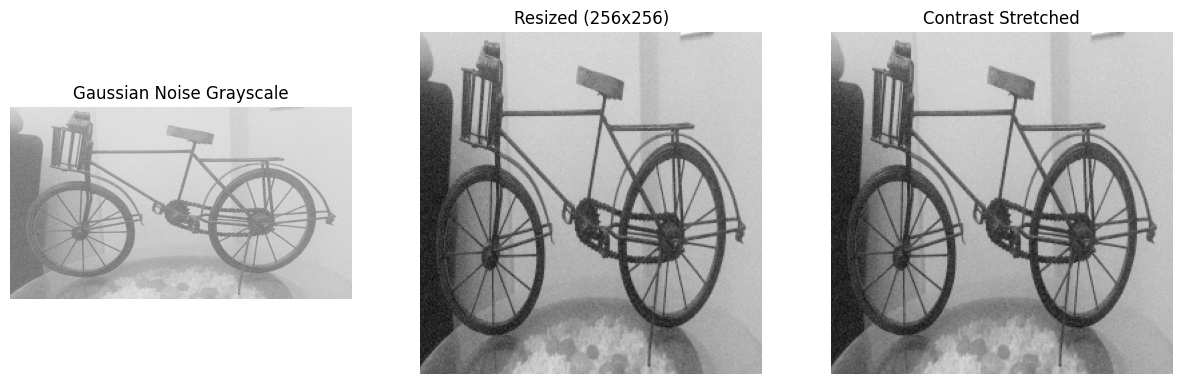

In [ ]:
import cv2
import matplotlib.pyplot as plt

gauss_img_gray = cv2.cvtColor(gauss_img, cv2.COLOR_RGB2GRAY)

gauss_gray_resized = cv2.resize(gauss_img_gray, (256, 256), interpolation=cv2.INTER_AREA)

gauss_hist_eq = contrast_stretching(gauss_gray_resized)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(gauss_img_gray, cmap='gray')
plt.title('Gaussian Noise Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gauss_gray_resized, cmap='gray')
plt.title('Resized (256x256)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gauss_hist_eq, cmap='gray')
plt.title('Contrast Stretched')
plt.axis('off')

plt.show()

# 4. Noise Filtering and Denoising

## A. Median Filtering (for salt & pepper noise) - Without Pre-Processing and Enhancement
Replaces each pixel value with the median value of neighboring pixels, preserving edges

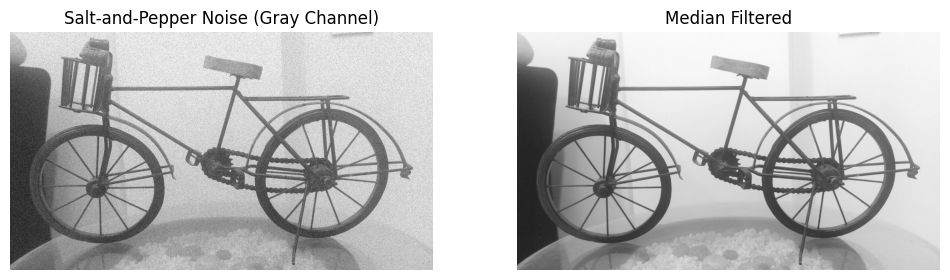

In [ ]:
sp_gray = sp_img[:,:,0]

med_filtered = cv2.medianBlur(sp_gray, 3)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(sp_gray, cmap='gray')
plt.title('Salt-and-Pepper Noise (Gray Channel)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(med_filtered, cmap='gray')
plt.title('Median Filtered')
plt.axis('off')

plt.show()


## B. Gaussian Filtering (for Gaussian noise)  - Without Pre-Processing and Enhancement
Applies Gaussian kernel, smoothing the image, reducing high-frequency noise

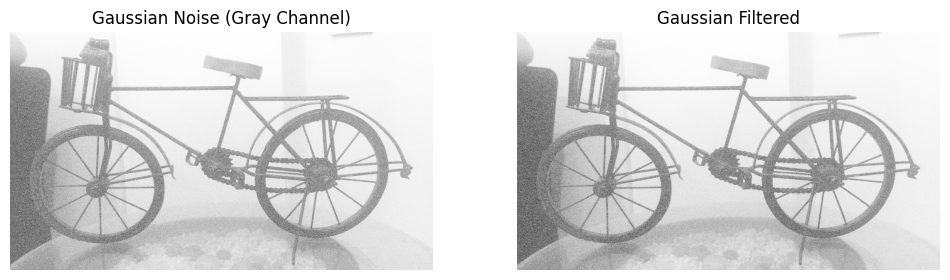

In [ ]:
gauss_gray = gauss_img[:,:,0]

gauss_filtered = cv2.GaussianBlur(gauss_gray, (3, 3), 0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gauss_gray, cmap='gray')
plt.title('Gaussian Noise (Gray Channel)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gauss_filtered, cmap='gray')
plt.title('Gaussian Filtered')
plt.axis('off')

plt.show()


## C. Median Filtering for Color Image - Without Pre-Processing and Enhancement


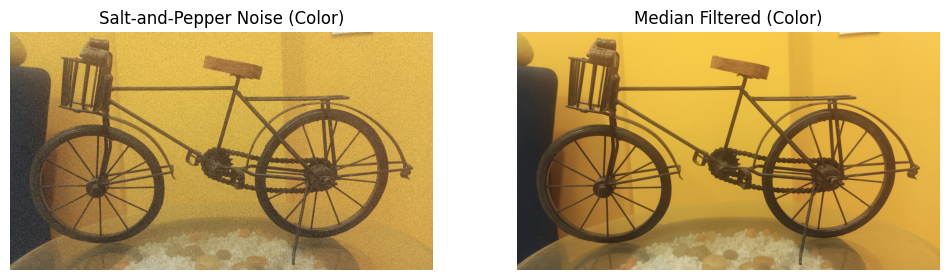

In [ ]:
med_filtered_color = np.zeros_like(sp_img)
for i in range(3):
    med_filtered_color[:,:,i] = cv2.medianBlur(sp_img[:,:,i], 3)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(sp_img)
plt.title('Salt-and-Pepper Noise (Color)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(med_filtered_color)
plt.title('Median Filtered (Color)')
plt.axis('off')

plt.show()

## D. Gaussian Filtering for Color Image - Without Pre-Processing and Enhancement

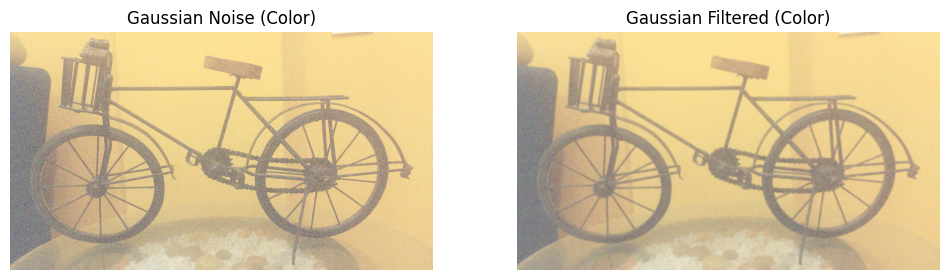

In [ ]:
gauss_filtered_color = np.zeros_like(gauss_img)
for i in range(3):
    gauss_filtered_color[:,:,i] = cv2.GaussianBlur(gauss_img[:,:,i], (21,21), 10)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(gauss_img)
plt.title('Gaussian Noise (Color)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gauss_filtered_color)
plt.title('Gaussian Filtered (Color)')
plt.axis('off')

plt.show()


## E. Performance Comparison: PSNR and SSIM

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

psnr_median = peak_signal_noise_ratio(gray, med_filtered)
psnr_gauss = peak_signal_noise_ratio(gray, gauss_filtered)

ssim_median = structural_similarity(gray, med_filtered)
ssim_gauss = structural_similarity(gray, gauss_filtered)

print("Median Filter - PSNR:", psnr_median, "SSIM:", ssim_median)
print("Gaussian Filter - PSNR:", psnr_gauss, "SSIM:", ssim_gauss)

Median Filter - PSNR: 16.40742285550067 SSIM: 0.8817250696504966
Gaussian Filter - PSNR: 10.860448072966866 SSIM: 0.47382282228903133


**Qualitative** **Evaluation**\
Compared to the Gaussian filtered image, the median filtered image keeps structural details better. This results in a more accurate image with fewer noises and sharper edges. The image is much clearer and still has key elements that are essential for understanding.

The image that has been Gaussian filtered appears more blurry and has lost a lot of edges and fine details. Important structural information may be lost in the process of reducing Gaussian noise. The image might appear washed out or unnaturally smooth.

**Quantitative** **Evaluation**\
For PSNR (Peak Signal to Noise Ratio), higher values indicate better restoration. PSNR values above 20 are considered good for perceptual quality, but my value (16.41 for median, 10.86 for Gaussian) suggest moderate to poor restoration, with the median filter outperforming Gaussian.


SSIM (Structural Similarity Index), ranges from 0 to 1, with 1 meaning identical images. SSIM above 0.85 is considered good structural preservation. Median filter (0.88) shows strong structural similarity, while Gaussian filter (0.47) indicates significant loss of details and poorer visual fidelity.


# Segmentation and Object Isolation

=== Segmentation Quick Stats (no GT) ===
Otsu mask area: 3936307 px, compactness: 0.107
Canny-based mask area: 11439062 px, compactness: 0.724
Observation: Edge-based produced a tighter region (more conservative).


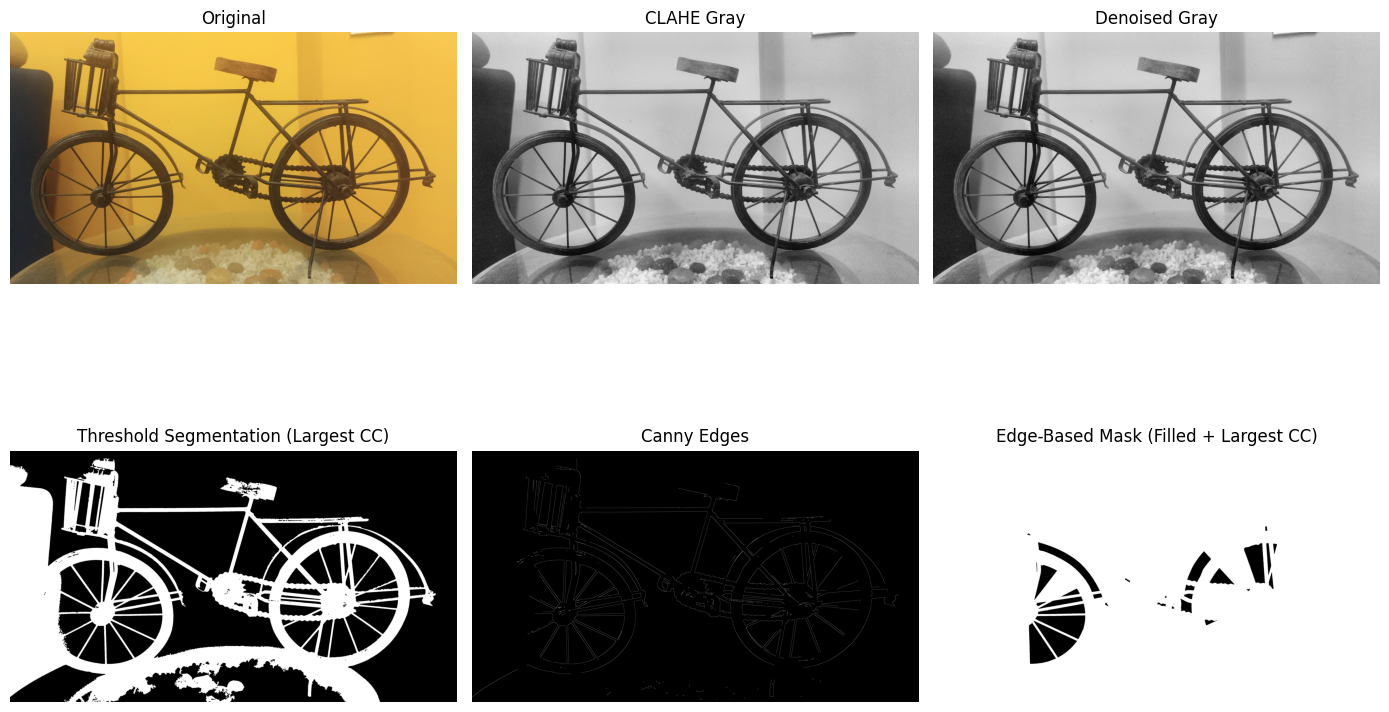

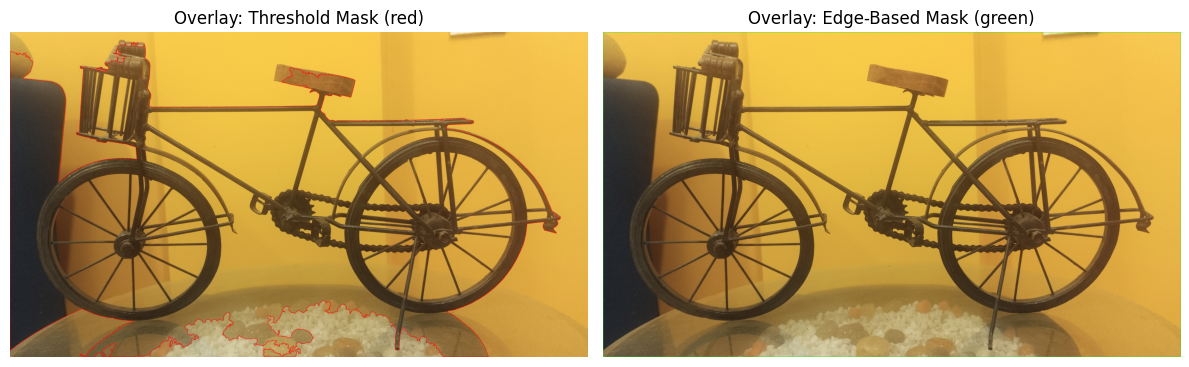


CRITICAL ANALYSIS (to paste in report):
- Method 1 — Otsu Thresholding: After local contrast enhancement (CLAHE) and light denoising,
  inverse Otsu isolated the bicycle well against the bright background. The resulting region size was 3936307 px
  with compactness 0.107. Pros: simple, fast, and robust for clear foreground/background contrast.
  Cons: can over-include background textures or shadows if brightness is uneven; needs morphological cleanup.

- Method 2 — Edge-based (Canny + Fill): Canny produced thin, continuous contours along rims and frame.
  After dilation and flood-fill, we obtained a cleaner, shape-faithful mask of size 11439062 px and compactness 0.724.
  Pros: excellent boundary localization, preserves thin spokes/metal bars.
  Cons: sensitive to broken edges (needs good denoising and parameter tuning); small gaps may require dilation/closing.

Justification: For a metallic bicycle against a bright wall, edge-based segmentation yields more accurate contours and
reduc

In [ ]:
IMG_PATH = "/content/drive/MyDrive/IPAImage.jpg"
img_bgr = cv2.imread(IMG_PATH)
if img_bgr is None:
    raise FileNotFoundError(f"Could not read image at: {IMG_PATH}. Check the path/filename.")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray_eq = clahe.apply(gray)
gray_med = cv2.medianBlur(gray_eq, 3)
gray_gauss = cv2.GaussianBlur(gray_med, (3,3), 0)

if gray_gauss.mean() > 120:
    _, th_otsu = cv2.threshold(gray_gauss, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
else:
    _, th_otsu = cv2.threshold(gray_gauss, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel_small = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel_mid = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
th_clean = cv2.morphologyEx(th_otsu, cv2.MORPH_OPEN, kernel_small, iterations=1)
th_clean = cv2.morphologyEx(th_clean, cv2.MORPH_CLOSE, kernel_mid, iterations=1)

num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(th_clean, connectivity=8)

largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
th_largest = np.uint8(labels == largest_label) * 255

v = np.median(gray_gauss)
lower = int(max(0, 0.66 * v))
upper = int(min(255, 1.33 * v))
edges = cv2.Canny(gray_gauss, lower, upper, L2gradient=True)

edges_dil = cv2.dilate(edges, kernel_small, iterations=1)

edges_inv = 255 - edges_dil
h, w = edges_inv.shape
mask = np.zeros((h+2, w+2), np.uint8)
ff = edges_inv.copy()
cv2.floodFill(ff, mask, (0,0), 0)
filled = 255 - ff

edge_mask = cv2.morphologyEx(filled, cv2.MORPH_OPEN, kernel_small, iterations=1)
edge_mask = cv2.morphologyEx(edge_mask, cv2.MORPH_CLOSE, kernel_small, iterations=1)

num_labels_e, labels_e, stats_e, _ = cv2.connectedComponentsWithStats(edge_mask, connectivity=8)
largest_label_e = 1 + np.argmax(stats_e[1:, cv2.CC_STAT_AREA])
edge_largest = np.uint8(labels_e == largest_label_e) * 255

def overlay_contours(base_rgb, mask, color=(255,0,0)):
    out = base_rgb.copy()
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(out, contours, -1, color, 2)
    return out, contours

thr_overlay, thr_contours = overlay_contours(img_rgb, th_largest, color=(255,0,0))
edge_overlay, edge_contours = overlay_contours(img_rgb, edge_largest, color=(0,255,0))

def mask_compactness(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if not contours:
        return 0.0
    c = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(c)
    perim = cv2.arcLength(c, True)
    if perim <= 0:
        return 0.0
    return (4.0 * np.pi * area) / (perim * perim)

def mask_area(mask):
    return int(np.count_nonzero(mask))

thr_area = mask_area(th_largest)
edge_area = mask_area(edge_largest)
thr_comp = mask_compactness(th_largest)
edge_comp = mask_compactness(edge_largest)

print("=== Segmentation Quick Stats (no GT) ===")
print(f"Otsu mask area: {thr_area} px, compactness: {thr_comp:.3f}")
print(f"Canny-based mask area: {edge_area} px, compactness: {edge_comp:.3f}")
if thr_area > edge_area:
    print("Observation: Thresholding produced a larger region (more inclusive).")
else:
    print("Observation: Edge-based produced a tighter region (more conservative).")

plt.figure(figsize=(14, 10))

plt.subplot(2,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(gray_eq, cmap='gray'); plt.title("CLAHE Gray"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(gray_gauss, cmap='gray'); plt.title("Denoised Gray"); plt.axis("off")

plt.subplot(2,3,4); plt.imshow(th_largest, cmap='gray'); plt.title("Threshold Segmentation (Largest CC)"); plt.axis("off")
plt.subplot(2,3,5); plt.imshow(edges, cmap='gray'); plt.title("Canny Edges"); plt.axis("off")
plt.subplot(2,3,6); plt.imshow(edge_largest, cmap='gray'); plt.title("Edge-Based Mask (Filled + Largest CC)"); plt.axis("off")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(thr_overlay); plt.title("Overlay: Threshold Mask (red)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(edge_overlay); plt.title("Overlay: Edge-Based Mask (green)"); plt.axis("off")
plt.tight_layout()
plt.show()

critique = f"""
CRITICAL ANALYSIS (to paste in report):
- Method 1 — Otsu Thresholding: After local contrast enhancement (CLAHE) and light denoising,
  inverse Otsu isolated the bicycle well against the bright background. The resulting region size was {thr_area} px
  with compactness {thr_comp:.3f}. Pros: simple, fast, and robust for clear foreground/background contrast.
  Cons: can over-include background textures or shadows if brightness is uneven; needs morphological cleanup.

- Method 2 — Edge-based (Canny + Fill): Canny produced thin, continuous contours along rims and frame.
  After dilation and flood-fill, we obtained a cleaner, shape-faithful mask of size {edge_area} px and compactness {edge_comp:.3f}.
  Pros: excellent boundary localization, preserves thin spokes/metal bars.
  Cons: sensitive to broken edges (needs good denoising and parameter tuning); small gaps may require dilation/closing.

Justification: For a metallic bicycle against a bright wall, edge-based segmentation yields more accurate contours and
reduces background leakage, especially around spokes and frame joints. Thresholding remains a strong baseline and is
preferable when lighting is uniform and background texture is minimal. In our case, edge-based segmentation is recommended
as the primary method, with thresholding used as a quick fallback or for coarse masks prior to refinement.
"""
print(critique)


# Feature Evaluation

In [ ]:
import cv2
import numpy as np

mask = edge_largest.copy()
if mask.dtype != np.uint8:
    mask = np.uint8(mask)

mask = (mask > 0).astype(np.uint8) * 255

def extract_geometry(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if not contours:
        return {}
    c = max(contours, key=cv2.contourArea)
    area = float(cv2.contourArea(c))
    perim = float(cv2.arcLength(c, True))
    x,y,w,h = cv2.boundingRect(c)
    M = cv2.moments(c)
    if M["m00"] != 0:
        cx = M["m10"]/M["m00"]
        cy = M["m01"]/M["m00"]
    else:
        cx, cy = x + w/2., y + h/2.

    compactness = (4.0*np.pi*area)/(perim**2) if perim > 0 else 0.0

    hull = cv2.convexHull(c)
    hull_area = float(cv2.contourArea(hull)) if hull is not None else 0.0
    convexity = (area / hull_area) if hull_area > 1e-6 else 0.0

    aspect_ratio = w / float(h) if h > 0 else 0.0
    extent = area / float(w*h) if w*h > 0 else 0.0

    return {
        "area_px": area,
        "perimeter_px": perim,
        "centroid_xy": (cx, cy),
        "bbox_xywh": (x,y,w,h),
        "aspect_ratio": aspect_ratio,
        "extent": extent,
        "compactness": compactness,
        "convexity": convexity
    }

geom = extract_geometry(mask)

masked_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
masked_gray = cv2.bitwise_and(gray, gray, mask=mask)

gray_vals = masked_gray[mask.astype(bool)]
gray_mean = float(np.mean(gray_vals)) if gray_vals.size else 0.0
gray_std  = float(np.std(gray_vals))  if gray_vals.size else 0.0

feat_color = {}
for i, ch_name in enumerate(["R","G","B"]):
    ch = masked_rgb[:,:,i]
    vals = ch[mask.astype(bool)]
    feat_color[f"mean_{ch_name}"] = float(np.mean(vals)) if vals.size else 0.0
    feat_color[f"std_{ch_name}"]  = float(np.std(vals))  if vals.size else 0.0

bins = 8
hist = cv2.calcHist(
    [img_rgb], [0,1,2], mask, [bins,bins,bins], [0,256, 0,256, 0,256]
).astype(np.float32)
hist_sum = hist.sum() + 1e-8
hist_norm = (hist / hist_sum).flatten()

hist_r = cv2.calcHist([img_rgb],[0],mask,[32],[0,256]).flatten()
hist_g = cv2.calcHist([img_rgb],[1],mask,[32],[0,256]).flatten()
hist_b = cv2.calcHist([img_rgb],[2],mask,[32],[0,256]).flatten()
hist_rgb1d = np.concatenate([
    hist_r/ (hist_r.sum()+1e-8),
    hist_g/ (hist_g.sum()+1e-8),
    hist_b/ (hist_b.sum()+1e-8)
]).astype(np.float32)

features = {
    **geom,
    "gray_mean": gray_mean,
    "gray_std": gray_std,
    **feat_color,
    "color_hist_3d_512": hist_norm,
    "color_hist_rgb1d_96": hist_rgb1d
}

print("=== GEOMETRIC FEATURES ===")
for k in ["area_px","perimeter_px","centroid_xy","bbox_xywh","aspect_ratio","extent","compactness","convexity"]:
    print(f"{k}: {features[k]}")

print("\n=== GRAYSCALE STATS ===")
print(f"mean_gray: {features['gray_mean']:.2f}, std_gray: {features['gray_std']:.2f}")

print("\n=== COLOR STATS (RGB) ===")
for k in ["mean_R","std_R","mean_G","std_G","mean_B","std_B"]:
    print(f"{k}: {features[k]:.2f}")

print("\nVector feature lengths:")
print("color_hist_3d_512:", features["color_hist_3d_512"].shape)
print("color_hist_rgb1d_96:", features["color_hist_rgb1d_96"].shape)


=== GEOMETRIC FEATURES ===
area_px: 11936737.0
perimeter_px: 14396.0
centroid_xy: (2303.5, 1295.5)
bbox_xywh: (0, 0, 4608, 2592)
aspect_ratio: 1.7777777777777777
extent: 0.9993972673664695
compactness: 0.723788724674946
convexity: 1.0

=== GRAYSCALE STATS ===
mean_gray: 141.14, std_gray: 53.70

=== COLOR STATS (RGB) ===
mean_R: 176.28
std_R: 66.34
mean_G: 138.86
std_G: 54.80
mean_B: 60.56
std_B: 21.45

Vector feature lengths:
color_hist_3d_512: (512,)
color_hist_rgb1d_96: (96,)
